# Linear Regression

In [computational learning theory](https://eliassi.org/COLTSurveyArticle.pdf), a learning algorithm (or learner) 
$A$ is an algorithm that chooses a hypothesis $h$ (which is a function) $( h: X \to Y )$, where $( X )$ 
is the input space and $( Y )$ is the target space, from the hypothesis space $( H )$.
Consider the following: 

Where the hypothesis is a function:
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

Such is a Univariate linear regression

# Cost Function

<div style="text-align: center;">
    <img src="cost_function.png" alt="My Image" width="300"/>
</div>

Prediction using $f$ on $i$-th training feature $x^{(i)}$, is $\hat{y}$
$$ f_{w,b}(x^{(i)}) = \hat{y} = wx^{(i)} + b$$

We define a cost function $J$:

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y} - y^{(i)} \right)^2 $$

$$  = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2 $$

$$  = \frac{1}{2m} \sum_{i=1}^{m} \left( wx^{(i)} + b - y^{(i)} \right)^2 $$

Where m is the number of training examples

We want to minimize the error:

$$ \underset{w, b}{\text{minimize}} \, J(w, b) $$

Let $x^{(1)}$ be the inital condition:

<div style="text-align: center;">
    <img src="min_cost_function.png" alt="My Image" width="600"/>
</div>

$$ \underset{w}{\text{minimize}} \, J(w) = min \frac{1}{2m} \sum_{i=1}^{m} \left( wx^{(i)} - y^{(i)} \right)^2 $$

$J(w)$ as a function of $w$ can be minimized. 

General Case:

$$ \underset{w, b}{\text{minimize}} \, J(w, b) $$

Linear regression: 

$$ \underset{w}{\text{minimize}} \, J(w) $$

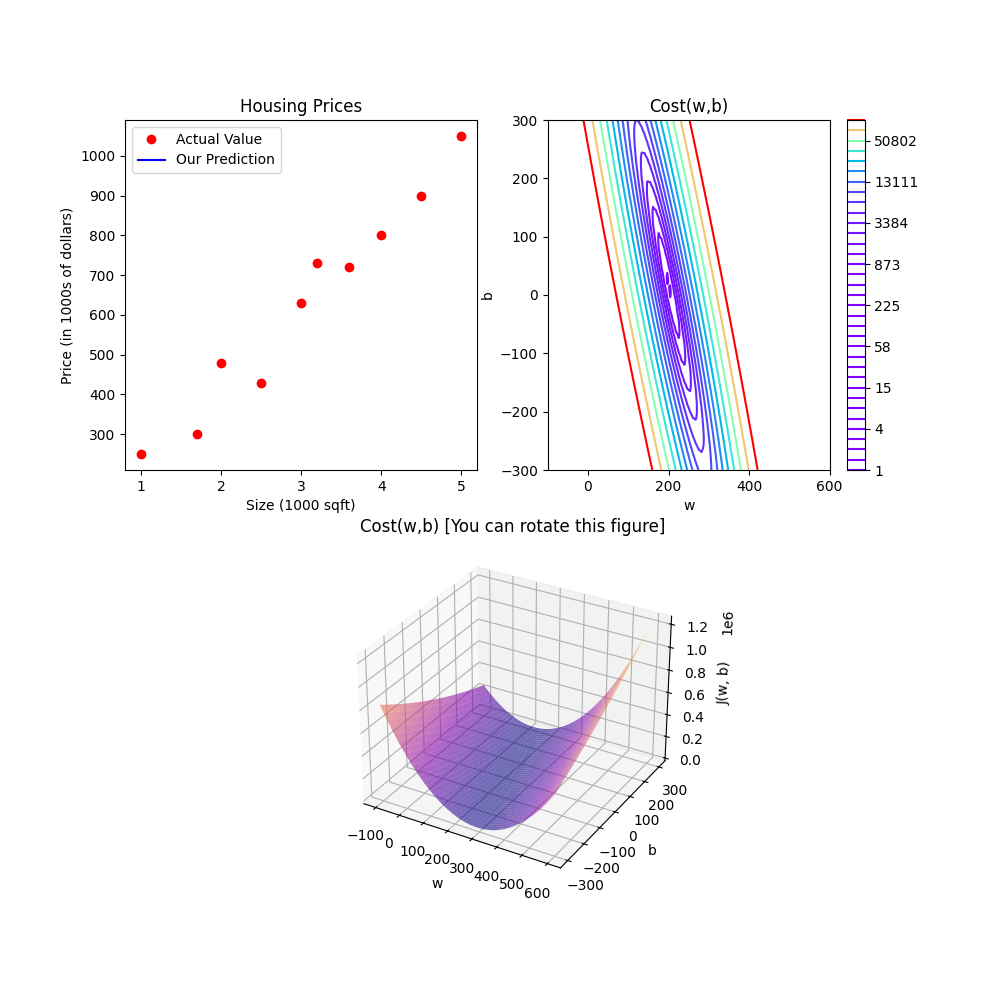

In [20]:
# Ensure you have `ipympl` installed
# %pip install ipympl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

# Activate interactive mode
%matplotlib widget

# Function to compute cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    return (1 / (2 * m)) * cost_sum

# Training data
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2, 3.6, 4.0, 4.5, 5.0])
y_train = np.array([250, 300, 480, 430, 630, 730, 720, 800, 900, 1050])

# Create a function to plot the line of best fit, cost contour, and 3D cost surface
def plot_interactive_fit():
    # Set up the figure and axes
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(2, 2, 1)  # Housing Prices plot
    ax2 = fig.add_subplot(2, 2, 2)  # Contour plot of cost
    ax3 = fig.add_subplot(2, 1, 2, projection='3d')  # 3D surface plot

    # Plot the initial housing prices on the left (ax1)
    ax1.set_title('Housing Prices')
    ax1.set_xlabel('Size (1000 sqft)')
    ax1.set_ylabel('Price (in 1000s of dollars)')
    scatter = ax1.plot(x_train, y_train, 'ro', label='Actual Value')
    line, = ax1.plot([], [], 'b-', label='Our Prediction')  # Empty line, will be updated later
    ax1.legend()

    # Set grid ranges for contour plot
    w_range = np.linspace(-100, 600, 100)
    b_range = np.linspace(300, -300, 100)
    W, B = np.meshgrid(w_range, b_range)
    Z = np.array([[compute_cost(x_train, y_train, w, b) for w in w_range] for b in b_range])

    # Contour plot of the cost function (ax2)
    ax2.set_title('Cost(w,b)')
    CS = ax2.contour(W, B, Z, levels=np.logspace(0, 5, 35), cmap='rainbow')
    plt.colorbar(CS, ax=ax2)
    ax2.set_xlabel('w')
    ax2.set_ylabel('b')
    
    # Placeholder for clicked point
    point, = ax2.plot([], [], 'bo', label='Selected w,b')

    # 3D surface plot of the cost function (ax3)
    ax3.set_title('Cost(w,b) [You can rotate this figure]')
    ax3.plot_surface(W, B, Z, cmap='plasma', alpha=0.6)
    ax3.set_xlabel('w')
    ax3.set_ylabel('b')
    ax3.set_zlabel('J(w, b)')
    
    # Placeholder for the 3D point of the selected w, b values
    point3d, = ax3.plot([], [], [], 'ro', markersize=8)

    # Update the plots with selected w and b values
    def update_line_of_best_fit(w, b):
        # Update the prediction line on the left plot (ax1)
        predicted_prices = w * x_train + b
        line.set_data(x_train, predicted_prices)
        
        # Update the position of the clicked point on the contour plot (ax2)
        point.set_data([w], [b])  # Use lists or arrays to avoid the "x must be a sequence" error
        
        # Update the 3D point on the cost surface (ax3)
        cost_value = compute_cost(x_train, y_train, w, b)
        point3d.set_data([w], [b])  # x and y should be lists or arrays
        point3d.set_3d_properties([cost_value])

        # Redraw the plots
        fig.canvas.draw()

    # Function to handle clicks on the contour plot
    def onclick(event):
        if event.inaxes == ax2:  # Make sure the click is on the contour plot
            # Get clicked coordinates
            w_clicked = event.xdata
            b_clicked = event.ydata
            # Update the plots with the selected values
            update_line_of_best_fit(w_clicked, b_clicked)

    # Connect the click event to the figure
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

    # Display the figure
    plt.show()

# Call the interactive plot function
plot_interactive_fit()
